# Парсер HeadHunter
 чтобы получать  вакансии, которые интересны мне

Для этого буду использовать?
* requests - для отправки запросов к API HH
* json - для декодирования ответов в удобном формате
* pandas - для формирования таблицы 
* matplotlib, seaborn - визуализация
* IPython для магических штук

### Импорт библиотек

In [1]:
import requests
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta
import time

from IPython.core.display import display, HTML, clear_output
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 30)

In [2]:
#!pip freeze

In [3]:
import pathlib
from pathlib import Path

file = open("D:/Рабочие проги/Юпитер/hh/BleskList.txt","r")

file = open("D:\\Рабочие проги\\Юпитер\\hh\\BleskList.txt","r")

file = open("C:/Users/Рабочие проги/Юпитер/hh/BleskList.txt","r")

file = open("D:\\Рабочие проги\\Юпитер\\BleskList.txt".txt","r")

with open('C:\Job_Program\1.txt') as inf:  # открываем файл
    a = inf.readline().strip() # чтение строк. .strip() убирает переходы на новую строку, пробелы, табуляцию.
    b = inf.readline().strip()
    # Закрытие файла автоматически
print(a, b)

with open('superpuperfile.txt', 'w') as ouf:
    ouf.write('hello world\t')
    ouf.write(str(25))
    # Закрытие файла автоматически

### Делаем выгрузку из HeadHunter
Ссылка на API: https://github.com/hhru/api \
Для того, чтобы написать запрос используется язык поисковых запросов, задокументированный тут: https://hh.ru/article/1175 \
Фильтрацию можно делать в самом запросе, например, сделать поиск по полю компаний или же по наличию конкретного текста в описании, где COMPANY_NAME - название компании, а DESCRIPTION - описание вакансии. Причем интересно, что этот язык запросов работает и на обычном сайте hh.ru, что бывает иногда полезно

Создадим необходимые константы: BASE_URL

In [4]:
# Для запросов формируем их и дату
BASE_URL = "https://api.hh.ru/"
TEXT = f'NAME:("Machine Learning Engineer" OR "Data Scientist" OR "Дата саентист" OR "Machine Learning Developer" or "Machine Learning Researcher" or "Искусственный интеллект" or "Машинное обучение" or "Специалист по machine learning" or "Специалист по машинному обучению" or "AI engineer" or "Разработчик ML" or "Data Science" or "Machine Learning" or "Artificial Intelligence" or "ML Engineer" or "Аналитик" or "Analyst" or "Data Engineer" or "DWH" or "BI" or "Business Intelligence" or "Data инженер" or "Инженер данных" or "ETL" or "КХД")'
dt_now = datetime.now().date()
dt_from = dt_now - timedelta(days=21)
DATE_TO = '%s-%02d-%02d' % (dt_now.year, dt_now.month, dt_now.day)
DATE_FROM = '%s-%02d-%02d' % (dt_from.year, dt_from.month, dt_from.day)

VAC_URL = BASE_URL + f'vacancies?text={TEXT}&date_from={DATE_FROM}&date_to={DATE_TO}&responses_count_enabled=True&per_page=100'

In [5]:
DATE_FROM

'2022-03-14'

In [6]:
#Создали пустую таблицу
vacancy_df = pd.DataFrame()


В выдаче апи hh нет опыта, поэтому укажем его в запросе:\
Здесь можно выбрать необходимый именно тебе. Важно помнить, что можно откликаться на вакансии с "от 1 года опыта" :)

In [7]:
experiences = ['noExperience', # без опыта
               'between1And3',# опыт до 3 лет
              # 'between3And6', 
              # 'moreThan6'
              ]

In [8]:
for exp in experiences:
    page = 0
    url = VAC_URL + f'&experience={exp}'
    try:
        r = requests.get(url + f'&page={page}')
        data = json.loads(r.text)
        print('Количество страниц ', exp, data['pages'])
        items = data['items']
        for page in range(1, data['pages']):
            r = requests.get(url + f'&page={page}')
            data = json.loads(r.text)# вытаскиваю ответ на запрос
            items += data['items']
        df = pd.DataFrame(items)
        df['experience'] = exp
        vacancy_df = pd.concat([vacancy_df, df])# записываю в таблицу данные
    except Exception as e:
        print(e)

Количество страниц  noExperience 8
Количество страниц  between1And3 20


In [9]:
vacancy_df.reset_index(drop=True, inplace=True)

In [10]:
vacancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 0 to 2748
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        2749 non-null   object
 1   premium                   2749 non-null   bool  
 2   name                      2749 non-null   object
 3   department                251 non-null    object
 4   has_test                  2749 non-null   bool  
 5   response_letter_required  2749 non-null   bool  
 6   area                      2749 non-null   object
 7   salary                    1035 non-null   object
 8   type                      2749 non-null   object
 9   address                   1655 non-null   object
 10  response_url              0 non-null      object
 11  sort_point_distance       0 non-null      object
 12  published_at              2749 non-null   object
 13  created_at                2749 non-null   object
 14  archived                

In [11]:
vacancy_df.head()

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,response_url,sort_point_distance,published_at,created_at,archived,apply_alternate_url,insider_interview,url,alternate_url,relations,employer,snippet,contacts,schedule,counters,working_days,working_time_intervals,working_time_modes,accept_temporary,experience
0,53402632,False,Аналитик,None,False,False,"{'id': '95', 'name': 'Тюмень', 'url': 'https:/...","{'from': 55000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-04-04T07:34:56+0300,2022-04-04T07:34:56+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,None,https://api.hh.ru/vacancies/53402632?host=hh.ru,https://hh.ru/vacancy/53402632,[],"{'id': '941566', 'name': 'КОМТЕК', 'url': 'htt...","{'requirement': 'Аналитические способности, си...",None,"{'id': 'remote', 'name': 'Удаленная работа'}",{'responses': 368},[],[],[],False,noExperience
1,54393639,False,Стажер/Big Data Engineer,None,False,False,"{'id': '1002', 'name': 'Минск', 'url': 'https:...",None,"{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-04-03T17:31:12+0300,2022-04-03T17:31:12+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,None,https://api.hh.ru/vacancies/54393639?host=hh.ru,https://hh.ru/vacancy/54393639,[],"{'id': '774571', 'name': 'ISsoft Solutions', '...",{'requirement': 'Студентов 3-4 курса профильны...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",{'responses': 324},[],[],[],False,noExperience
2,54393641,False,Стажер/Big Data Engineer,None,False,False,"{'id': '1003', 'name': 'Гомель', 'url': 'https...",None,"{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-04-03T17:31:12+0300,2022-04-03T17:31:12+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,None,https://api.hh.ru/vacancies/54393641?host=hh.ru,https://hh.ru/vacancy/54393641,[],"{'id': '774571', 'name': 'ISsoft Solutions', '...",{'requirement': 'Студентов 3-4 курса профильны...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",{'responses': 138},[],[],[],False,noExperience
3,54393642,False,Стажер/Big Data Engineer,None,False,False,"{'id': '1007', 'name': 'Брест', 'url': 'https:...",None,"{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-04-03T17:31:12+0300,2022-04-03T17:31:12+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,None,https://api.hh.ru/vacancies/54393642?host=hh.ru,https://hh.ru/vacancy/54393642,[],"{'id': '774571', 'name': 'ISsoft Solutions', '...",{'requirement': 'Студентов 3-4 курса профильны...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",{'responses': 198},[],[],[],False,noExperience
4,54387696,False,Data Engineer (Perception Self driving),None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-04-03T15:27:08+0300,2022-04-03T15:27:08+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,None,https://api.hh.ru/vacancies/54387696?host=hh.ru,https://hh.ru/vacancy/54387696,[],"{'id': '5267014', 'name': 'SberAutoTech', 'url...",{'requirement': 'Отличные навыки программирова...,None,"{'id': 'fullDay', 'name': 'Полный день'}",{'responses': 40},[],[],[],False,noExperience


### Вытащим ценную информацию из словарей

In [12]:
# Если поле пустое то вылезит ошибка, эти данные ми и заполним
def return_id(x, key='id', nan_value=np.nan):
    try:
        return x[key]
    except Exception as e:
        return nan_value

In [13]:
# Добавили в таблицу данные
# Имя работодателя
vacancy_df['employer_name'] = vacancy_df['employer'].apply(return_id, key='name')
vacancy_df['department_name'] = vacancy_df['department'].apply(return_id, key='name')
# Зарплата
vacancy_df['salary_from'] = vacancy_df['salary'].apply(return_id, key='from')
vacancy_df['salary_to'] = vacancy_df['salary'].apply(return_id, key='to')
vacancy_df['salary_gross'] = vacancy_df['salary'].apply(return_id, key='gross')
vacancy_df['salary_currency'] = vacancy_df['salary'].apply(return_id, key='currency')
vacancy_df['counters'] = vacancy_df['counters'].apply(return_id, key='responses')
vacancy_df['city'] = vacancy_df['area'].apply(return_id, key='name')

In [14]:
vacancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 0 to 2748
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        2749 non-null   object 
 1   premium                   2749 non-null   bool   
 2   name                      2749 non-null   object 
 3   department                251 non-null    object 
 4   has_test                  2749 non-null   bool   
 5   response_letter_required  2749 non-null   bool   
 6   area                      2749 non-null   object 
 7   salary                    1035 non-null   object 
 8   type                      2749 non-null   object 
 9   address                   1655 non-null   object 
 10  response_url              0 non-null      object 
 11  sort_point_distance       0 non-null      object 
 12  published_at              2749 non-null   object 
 13  created_at                2749 non-null   object 
 14  archived

In [15]:
vacancy_df.head(10)

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,response_url,sort_point_distance,published_at,created_at,archived,...,contacts,schedule,counters,working_days,working_time_intervals,working_time_modes,accept_temporary,experience,employer_name,department_name,salary_from,salary_to,salary_gross,salary_currency,city
0,53402632,False,Аналитик,None,False,False,"{'id': '95', 'name': 'Тюмень', 'url': 'https:/...","{'from': 55000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-04-04T07:34:56+0300,2022-04-04T07:34:56+0300,False,...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",368,[],[],[],False,noExperience,КОМТЕК,NaN,55000.0,NaN,False,RUR,Тюмень
1,54393639,False,Стажер/Big Data Engineer,None,False,False,"{'id': '1002', 'name': 'Минск', 'url': 'https:...",None,"{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-04-03T17:31:12+0300,2022-04-03T17:31:12+0300,False,...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",324,[],[],[],False,noExperience,ISsoft Solutions,NaN,NaN,NaN,NaN,NaN,Минск
2,54393641,False,Стажер/Big Data Engineer,None,False,False,"{'id': '1003', 'name': 'Гомель', 'url': 'https...",None,"{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-04-03T17:31:12+0300,2022-04-03T17:31:12+0300,False,...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",138,[],[],[],False,noExperience,ISsoft Solutions,NaN,NaN,NaN,NaN,NaN,Гомель
3,54393642,False,Стажер/Big Data Engineer,None,False,False,"{'id': '1007', 'name': 'Брест', 'url': 'https:...",None,"{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-04-03T17:31:12+0300,2022-04-03T17:31:12+0300,False,...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",198,[],[],[],False,noExperience,ISsoft Solutions,NaN,NaN,NaN,NaN,NaN,Брест
4,54387696,False,Data Engineer (Perception Self driving),None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-04-03T15:27:08+0300,2022-04-03T15:27:08+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",40,[],[],[],False,noExperience,SberAutoTech,NaN,NaN,NaN,NaN,NaN,Москва
5,54540870,False,Продуктовый аналитик,"{'id': '3529-3529-prof', 'name': 'Сбер для экс...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-04-04T08:16:46+0300,2022-04-04T08:16:46+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",2,[],[],[],False,noExperience,Сбербанк,Сбер для экспертов,NaN,NaN,NaN,NaN,Москва
6,52449389,False,Младший аналитик,None,False,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...","{'from': 35000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",None,None,2022-04-04T07:23:04+0300,2022-04-04T07:23:04+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",69,[],[],[],False,noExperience,Информационные системы и сервисы,NaN,35000.0,NaN,True,RUR,Новосибирск
7,54537782,False,Кредитный аналитик,None,False,False,"{'id': '106', 'name': 'Чита', 'url': 'https://...","{'from': 30600, 'to': 35000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-04-04T05:13:01+0300,2022-04-04T05:13:01+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",1,[],[],[],False,noExperience,Россельхозбанк,NaN,30600.0,35000.0,False,RUR,Чита
8,52665753,False,Аналитик-экономист,None,False,False,"{'id': '54', 'name': 'Красноярск', 'url': 'htt...","{'from': 38000, 'to': 48000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Красноярск', 'street': 'улица Горько...",None,None,2022-04-04T04:17:21+0300,2022-04-04T04:17:21+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",1,[],[],[],False,noExperience,"Красный Яр, Сеть Гастрономов",NaN,38000.0,48000.0,False,RUR,Красноярск
9,52182772,False,Data engineer / дата инженер,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://

### Про дубликаты

In [16]:
vacancy_df[vacancy_df.duplicated(['employer_name', 'name'], keep=False)][['employer_name', 'name', 'city', 'experience']].sort_values(by=['name'])

,employer_name,name,city,experience
1495,Coleman Group,BI Analyst (удаленная работа),Санкт-Петербург,between1And3
1496,Coleman Group,BI Analyst (удаленная работа),Воронеж,between1And3
1036,Финстек Бел,Business Analyst,Минск,between1And3
1035,Финстек Бел,Business Analyst,Москва,between1And3
1966,Itransition,Business Analyst Middle,Армения,between1And3
...,...,...,...,...
507,ANCOR,Экономист-аналитик,Тула,noExperience
1799,РАДОМ,Экономист-аналитик,Белгород,between1And3
1798,РАДОМ,Экономист-аналитик,Шебекино,between1And3
508,ANCOR,Экономист-аналитик,Ефремов,noExperience


### Посмотрим компании, предлагающие вакансии, а также города

<AxesSubplot:>

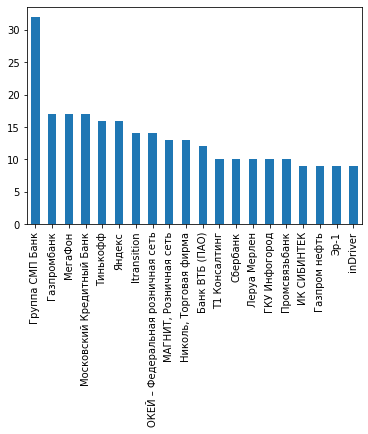

In [17]:
vacancy_df['employer_name'].value_counts().head(20).plot(kind='bar')

<AxesSubplot:>

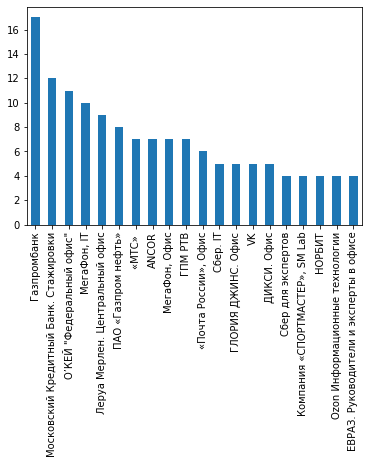

In [18]:
vacancy_df['department_name'].value_counts().head(20).plot(kind='bar')

<AxesSubplot:>

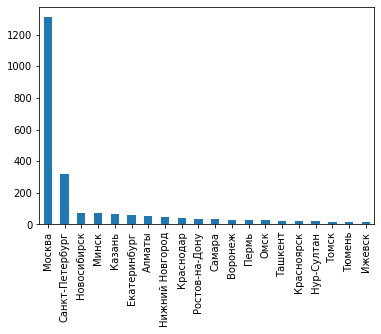

In [19]:
vacancy_df['city'].value_counts().head(20).plot(kind='bar')

### Что с зарплатой?

In [20]:
vacancy_df['salary_from']

0       55000.0
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
2744        NaN
2745        NaN
2746        NaN
2747    50000.0
2748    50000.0
Name: salary_from, Length: 2749, dtype: float64

In [21]:
vacancy_df['salary_from'].isna().value_counts(normalize=True)

True     0.674427
False    0.325573
Name: salary_from, dtype: float64

In [22]:
vacancy_df['salary_currency'].value_counts(normalize=True)

RUR    0.935266
KZT    0.027053
USD    0.017391
BYR    0.009662
UZS    0.006763
KGS    0.001932
EUR    0.001932
Name: salary_currency, dtype: float64

In [23]:
salaries = vacancy_df.query("salary_currency == 'RUR' and experience in ['noExperience', 'between1And3']").groupby(['employer_name', 'department_name']).mean()['salary_from'].reset_index()

In [24]:
salaries

,employer_name,department_name,salary_from
0,ANCOR,ANCOR,NaN
1,Crocus Group,Restaurants by Crocus Group,100000.000000
2,ZENDEN,ZENDEN. Закупки,100000.000000
3,"Виктория, Сеть супермаркетов",Виктория. Распределительный центр,39000.000000
4,ГЛОРИЯ ДЖИНС,ГЛОРИЯ ДЖИНС. Офис,53900.000000
5,Группа компаний МЕДСИ,ГК Медси. Управляющая компания,NaN
6,"ДИКСИ, группа компаний",ДИКСИ. Офис,68333.333333
7,"ДИКСИ, группа компаний",ДИКСИ. Распределительные центры,117000.000000
8,КАМАЗ,ПАО «КАМАЗ»,80000.000000
9,ЛАНИТ,Консист Бизнес Групп,30000.000000


<AxesSubplot:xlabel='employer_name', ylabel='salary_from'>

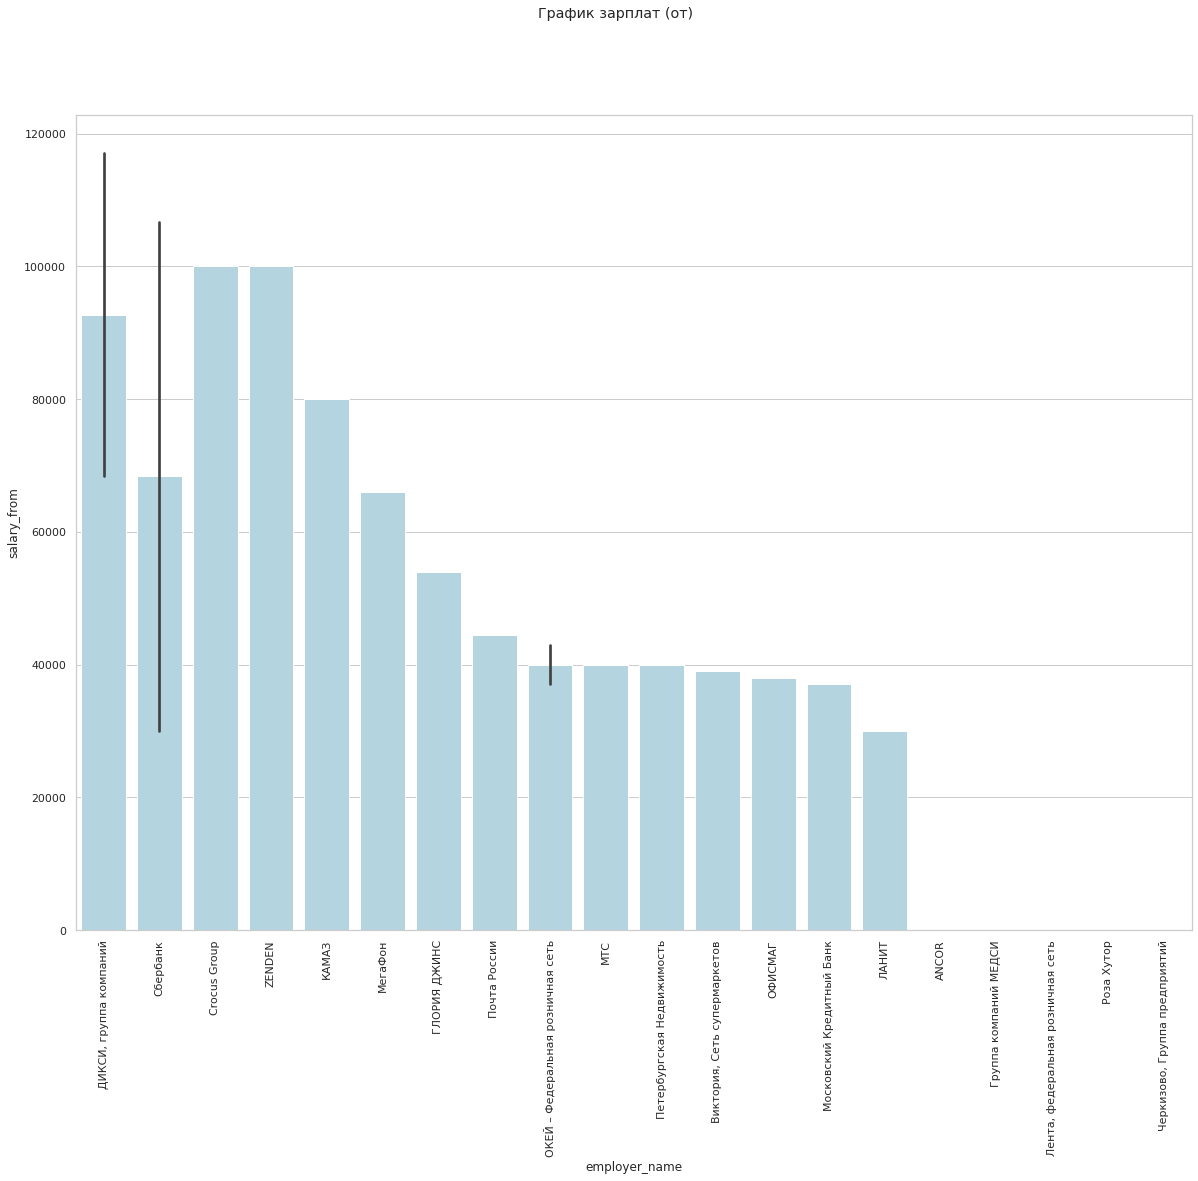

In [25]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(20,15))                
title = 'График зарплат (от)'
fig.suptitle(title)
plt.xticks(rotation=90)  
sns.barplot(data=salaries.sort_values(by='salary_from', ascending=False), x='employer_name', y='salary_from', color='lightblue', ax=ax)

In [26]:
salaries

,employer_name,department_name,salary_from
0,ANCOR,ANCOR,NaN
1,Crocus Group,Restaurants by Crocus Group,100000.000000
2,ZENDEN,ZENDEN. Закупки,100000.000000
3,"Виктория, Сеть супермаркетов",Виктория. Распределительный центр,39000.000000
4,ГЛОРИЯ ДЖИНС,ГЛОРИЯ ДЖИНС. Офис,53900.000000
5,Группа компаний МЕДСИ,ГК Медси. Управляющая компания,NaN
6,"ДИКСИ, группа компаний",ДИКСИ. Офис,68333.333333
7,"ДИКСИ, группа компаний",ДИКСИ. Распределительные центры,117000.000000
8,КАМАЗ,ПАО «КАМАЗ»,80000.000000
9,ЛАНИТ,Консист Бизнес Групп,30000.000000


In [27]:
vacancy_df.dropna(subset=['employer_name', 'salary_from'])[vacancy_df['employer_name'].str.lower().str.contains('альфа')]

/tmp/ipykernel_113/3289431858.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vacancy_df.dropna(subset=['employer_name', 'salary_from'])[vacancy_df['employer_name'].str.lower().str.contains('альфа')]


,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,response_url,sort_point_distance,published_at,created_at,archived,...,contacts,schedule,counters,working_days,working_time_intervals,working_time_modes,accept_temporary,experience,employer_name,department_name,salary_from,salary_to,salary_gross,salary_currency,city
1063,54517991,False,Бизнес-аналитик (группа BI разработки),None,False,False,"{'id': '88', 'name': 'Казань', 'url': 'https:/...","{'from': 70000, 'to': 70000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Казань', 'street': 'улица Аделя Куту...",None,None,2022-04-01T14:51:09+0300,2022-04-01T14:51:09+0300,False,...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",17,[],[],[],False,between1And3,ГК Альфа,NaN,70000.0,70000.0,True,RUR,Казань


### Давайте поищем вакансии в Городе Новосибирск

In [28]:
vacancy_df

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,response_url,sort_point_distance,published_at,created_at,archived,...,contacts,schedule,counters,working_days,working_time_intervals,working_time_modes,accept_temporary,experience,employer_name,department_name,salary_from,salary_to,salary_gross,salary_currency,city
0,53402632,False,Аналитик,None,False,False,"{'id': '95', 'name': 'Тюмень', 'url': 'https:/...","{'from': 55000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-04-04T07:34:56+0300,2022-04-04T07:34:56+0300,False,...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",368,[],[],[],False,noExperience,КОМТЕК,NaN,55000.0,NaN,False,RUR,Тюмень
1,54393639,False,Стажер/Big Data Engineer,None,False,False,"{'id': '1002', 'name': 'Минск', 'url': 'https:...",None,"{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-04-03T17:31:12+0300,2022-04-03T17:31:12+0300,False,...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",324,[],[],[],False,noExperience,ISsoft Solutions,NaN,NaN,NaN,NaN,NaN,Минск
2,54393641,False,Стажер/Big Data Engineer,None,False,False,"{'id': '1003', 'name': 'Гомель', 'url': 'https...",None,"{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-04-03T17:31:12+0300,2022-04-03T17:31:12+0300,False,...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",138,[],[],[],False,noExperience,ISsoft Solutions,NaN,NaN,NaN,NaN,NaN,Гомель
3,54393642,False,Стажер/Big Data Engineer,None,False,False,"{'id': '1007', 'name': 'Брест', 'url': 'https:...",None,"{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-04-03T17:31:12+0300,2022-04-03T17:31:12+0300,False,...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",198,[],[],[],False,noExperience,ISsoft Solutions,NaN,NaN,NaN,NaN,NaN,Брест
4,54387696,False,Data Engineer (Perception Self driving),None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-04-03T15:27:08+0300,2022-04-03T15:27:08+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",40,[],[],[],False,noExperience,SberAutoTech,NaN,NaN,NaN,NaN,NaN,Москва
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,54144072,False,HR Analyst (Senior Specialist),None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-03-21T11:19:42+0300,2022-03-21T11:19:42+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",13,[],[],[],False,between1And3,KPMG,NaN,NaN,NaN,NaN,NaN,Москва
2745,53087399,False,Аналитик отдела маркетинга,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'набережная Акаде...",None,None,2022-03-22T10:15:40+0300,2022-03-22T10:15:40+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",12,[],[],[],False,between1And3,Триал Маркет,NaN,NaN,NaN,NaN,NaN,Москва
2746,54272259,False,Системный аналитик (Оценка рисков),None,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': None, 'to': 250000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Санкт-Петербург', 'street': '2-я Сов...",None,None,2022-03-24T08:56:46+0300,2022-03-24T08:56:46+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",21,[],[],[],False,between1And3,СберЛизинг,NaN,NaN,250000.0,False,RUR,Санкт-Петербург
2747,54192347,False,Аналитик по производству,None,False,False,"{'id': '1512', 'name': 'Волжский (Волгоградска...","{'from': 50000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-03-22T10:01:45+0300,2022-03-22T10:01:45+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",24,[],[],[],False,between1And3,ТД ГраСС,NaN,50000.0,NaN,False,RUR,Волжский (Волгоградская область)


In [29]:
city_vacs = vacancy_df[vacancy_df['city'] == "Новосибирск"]

In [30]:
city_vacs['address']

6       {'city': None, 'street': None, 'building': Non...
10      {'city': 'Новосибирск', 'street': 'улица Добро...
16      {'city': None, 'street': None, 'building': Non...
39      {'city': 'Новосибирск', 'street': 'Красный про...
48      {'city': 'Новосибирск', 'street': 'улица Щетин...
                              ...                        
2553                                                 None
2654    {'city': 'Новосибирск', 'street': 'Красный про...
2659    {'city': 'Новосибирск', 'street': 'Советский р...
2707                                                 None
2717    {'city': 'Новосибирск', 'street': 'Советская у...
Name: address, Length: 73, dtype: object

In [31]:
city_vacs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 6 to 2717
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        73 non-null     object 
 1   premium                   73 non-null     bool   
 2   name                      73 non-null     object 
 3   department                5 non-null      object 
 4   has_test                  73 non-null     bool   
 5   response_letter_required  73 non-null     bool   
 6   area                      73 non-null     object 
 7   salary                    36 non-null     object 
 8   type                      73 non-null     object 
 9   address                   42 non-null     object 
 10  response_url              0 non-null      object 
 11  sort_point_distance       0 non-null      object 
 12  published_at              73 non-null     object 
 13  created_at                73 non-null     object 
 14  archived  

In [32]:
city_vacs.head(10)

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,response_url,sort_point_distance,published_at,created_at,archived,...,contacts,schedule,counters,working_days,working_time_intervals,working_time_modes,accept_temporary,experience,employer_name,department_name,salary_from,salary_to,salary_gross,salary_currency,city
6,52449389,False,Младший аналитик,None,False,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...","{'from': 35000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",None,None,2022-04-04T07:23:04+0300,2022-04-04T07:23:04+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",69,[],[],[],False,noExperience,Информационные системы и сервисы,NaN,35000.0,NaN,True,RUR,Новосибирск
10,53607009,False,Аналитик бизнес-процессов,None,False,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...","{'from': 28000, 'to': 36000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Новосибирск', 'street': 'улица Добро...",None,None,2022-04-04T05:30:37+0300,2022-04-04T05:30:37+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",0,[],[],[],False,noExperience,River Park Hotel,NaN,28000.0,36000.0,False,RUR,Новосибирск
16,54478211,False,Маркетолог-аналитик,None,False,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",None,None,2022-04-03T09:50:59+0300,2022-04-03T09:50:59+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",5,[],[],[],False,noExperience,ГАРС,NaN,NaN,NaN,NaN,NaN,Новосибирск
39,49295550,False,Инженер-аналитик,None,False,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...","{'from': None, 'to': 50000, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Новосибирск', 'street': 'Красный про...",None,None,2022-04-01T16:47:54+0300,2022-04-01T16:47:54+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",3,[],[],[],False,noExperience,"КРИСТА, НПО",NaN,NaN,50000.0,True,RUR,Новосибирск
48,52819002,False,Data Analyst (Marketing),None,False,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Новосибирск', 'street': 'улица Щетин...",None,None,2022-04-01T12:45:52+0300,2022-04-01T12:45:52+0300,False,...,None,"{'id': 'flexible', 'name': 'Гибкий график'}",37,[],[],[],False,noExperience,Dankolab,NaN,NaN,NaN,NaN,NaN,Новосибирск
73,49913966,False,Аналитик наукоёмкого софта,None,False,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...",None,"{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-04-01T14:41:41+0300,2022-04-01T14:41:41+0300,False,...,None,"{'id': 'flexible', 'name': 'Гибкий график'}",2,[],[],[],False,noExperience,AB Test Real,NaN,NaN,NaN,NaN,NaN,Новосибирск
107,54444968,False,Аналитик производства,None,False,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Новосибирск', 'street': 'улица Дуси ...",None,None,2022-03-30T08:49:29+0300,2022-03-30T08:49:29+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",6,[],[],[],False,noExperience,Холдинг Российские мясопродукты,NaN,NaN,NaN,NaN,NaN,Новосибирск
175,50837268,False,Аналитик информационных систем,None,False,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Новосибирск', 'street': 'Октябрьская...",None,None,2022-03-29T08:54:53+0300,2022-03-29T08:54:53+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",8,[],[],[],False,noExperience,Смарт консалтинг,NaN,NaN,NaN,NaN,NaN,Новосибирск
204,54360106,False,Аналитик по ценообразованию,None,False,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...","{'from': 70000, 'to': 90000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Новосибирск', 'street': 'Советский р...",None,None,2022-03-28T06:09:56+0300,2022-03-28T06:09:56

### Посмотрим содержание вакансий

In [33]:
vacs_df = city_vacs.copy().reset_index(drop=True).query("experience in ['noExperience', 'between1And3']")

In [34]:
vacs_df

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,response_url,sort_point_distance,published_at,created_at,archived,...,contacts,schedule,counters,working_days,working_time_intervals,working_time_modes,accept_temporary,experience,employer_name,department_name,salary_from,salary_to,salary_gross,salary_currency,city
0,52449389,False,Младший аналитик,None,False,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...","{'from': 35000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",None,None,2022-04-04T07:23:04+0300,2022-04-04T07:23:04+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",69,[],[],[],False,noExperience,Информационные системы и сервисы,NaN,35000.0,NaN,True,RUR,Новосибирск
1,53607009,False,Аналитик бизнес-процессов,None,False,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...","{'from': 28000, 'to': 36000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Новосибирск', 'street': 'улица Добро...",None,None,2022-04-04T05:30:37+0300,2022-04-04T05:30:37+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",0,[],[],[],False,noExperience,River Park Hotel,NaN,28000.0,36000.0,False,RUR,Новосибирск
2,54478211,False,Маркетолог-аналитик,None,False,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",None,None,2022-04-03T09:50:59+0300,2022-04-03T09:50:59+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",5,[],[],[],False,noExperience,ГАРС,NaN,NaN,NaN,NaN,NaN,Новосибирск
3,49295550,False,Инженер-аналитик,None,False,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...","{'from': None, 'to': 50000, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Новосибирск', 'street': 'Красный про...",None,None,2022-04-01T16:47:54+0300,2022-04-01T16:47:54+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",3,[],[],[],False,noExperience,"КРИСТА, НПО",NaN,NaN,50000.0,True,RUR,Новосибирск
4,52819002,False,Data Analyst (Marketing),None,False,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Новосибирск', 'street': 'улица Щетин...",None,None,2022-04-01T12:45:52+0300,2022-04-01T12:45:52+0300,False,...,None,"{'id': 'flexible', 'name': 'Гибкий график'}",37,[],[],[],False,noExperience,Dankolab,NaN,NaN,NaN,NaN,NaN,Новосибирск
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,53869379,False,Data-инженер/SQL-разработчик,None,False,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...",None,"{'id': 'open', 'name': 'Открытая'}",None,None,None,2022-03-15T12:00:39+0300,2022-03-15T12:00:39+0300,False,...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",13,[],[],[],False,between1And3,SOKOLOV,NaN,NaN,NaN,NaN,NaN,Новосибирск
69,52288222,False,Маркетолог-аналитик,None,False,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...","{'from': 44000, 'to': 44000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Новосибирск', 'street': 'Красный про...",None,None,2022-03-21T07:29:47+0300,2022-03-21T07:29:47+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",6,[],[],[],False,between1And3,"Сибирский цемент, Холдинговая компания",NaN,44000.0,44000.0,False,RUR,Новосибирск
70,51633510,False,Аналитик,None,False,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Новосибирск', 'street': 'Советский р...",None,None,2022-03-14T15:09:38+0300,2022-03-14T15:09:38+0300,False,...,None,"{'id': 'fullDay', 'name': 'Полный день'}",20,[],[],[],False,between1And3,Контур,NaN,NaN,NaN,NaN,NaN,Новосибирск
71,53272728,False,Аналитик складских запасов,None,False,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...",None,"{'id': 'open', 'name': 'Открытая'}",N

In [35]:
vacs_df['url']

0     https://api.hh.ru/vacancies/52449389?host=hh.ru
1     https://api.hh.ru/vacancies/53607009?host=hh.ru
2     https://api.hh.ru/vacancies/54478211?host=hh.ru
3     https://api.hh.ru/vacancies/49295550?host=hh.ru
4     https://api.hh.ru/vacancies/52819002?host=hh.ru
                           ...                       
68    https://api.hh.ru/vacancies/53869379?host=hh.ru
69    https://api.hh.ru/vacancies/52288222?host=hh.ru
70    https://api.hh.ru/vacancies/51633510?host=hh.ru
71    https://api.hh.ru/vacancies/53272728?host=hh.ru
72    https://api.hh.ru/vacancies/54429612?host=hh.ru
Name: url, Length: 73, dtype: object

Делю вакансии на котегории в Новосибирске

In [36]:
# Создаю пустой дата фрейм
columns_vacs_df=vacs_df.columns
df_video_data= pd.DataFrame(columns=columns_vacs_df)
#df_video_data.info()
#df_video_data

Смотрим по новосибирску

In [37]:
df_invest_data= pd.DataFrame(columns=columns_vacs_df)


In [38]:
url_vacs=vacs_df['url'][1]
vacs = json.loads(requests.get(url_vacs).text)['description']
vacs=vacs.lower()

## Рассмотрю для Новосибирска

In [39]:
# Создаю таблицы для копирования
columns_vacs_df=vacs_df.columns
df_invest_data_city= pd.DataFrame(columns=columns_vacs_df)
df_sport_data_city= pd.DataFrame(columns=columns_vacs_df)
df_video_data_city= pd.DataFrame(columns=columns_vacs_df)
df_distrib_data_city= pd.DataFrame(columns=columns_vacs_df)
df_marketing_data_city= pd.DataFrame(columns=columns_vacs_df)

df_others_city= pd.DataFrame(columns=columns_vacs_df)


# создаю индексы по котегории ванаксий
nomber_vacs_city=0
df_max=vacs_df['url'].count()

df_invest_count=0
df_invest=['инвестиции','инвестиций','акции','вложени','портфель','банк ',' банк']

df_sport_count=0
df_sport=['матч','трансляц']

df_video_count=0
df_video=['видео','изображен','зрени']

df_distrib_count=0
df_distrib=['ассортиме','полк']

df_marketing_count=0
df_marketing=['маркетинговое агенст','маркетинговая компан','digital агентств']


df_others_count=0

for index_vacs in range(1,df_max):
    url_vacs=vacs_df['url'][index_vacs]
    vacs = json.loads(requests.get(url_vacs).text)['description']
    vacs=vacs.lower()
    check=0 # Что бы одни и те же вакансии не выводились
    if 'python' in vacs:
         ############             Маркетинг
        #check==0
        for value in df_marketing:
            if check==0:
                if value in vacs:
                    df_marketing_count+=1
                    check=1
                    df_marketing_data_city = df_marketing_data_city.append(vacs_df.iloc[index_vacs], ignore_index=True)
                    #print('Добавили вакансию df_distrib')
                    #print(vacs,index_vacs)
                    #print('===========
        for value in df_invest:
            if check==0:
                if value in vacs:
                    df_invest_count+=1
                    df_invest_data_city = df_invest_data_city.append(vacs_df.iloc[index_vacs], ignore_index=True)
                    #print('Добавили вакансию df_invest', vacs_df.iloc[index_vacs]['id'])
                    #display(df_invest_data)
                    #print(vacs,index_vacs)
                    #print('===========================================================================================')
                    check=1
        #check==0            
        for value in df_sport:
            if check==0:
                if value in vacs:
                    df_sport_count+=1
                    check=1
                    df_sport_data_city = df_sport_data_city.append(vacs_df.iloc[index_vacs], ignore_index=True)
                    #print('Добавили вакансию df_sport')
                    #print(vacs,index_vacs)
                    #print('===========================================================================================')
        #check==0            
        for value in df_video:
            if check==0:
                if value in vacs:
                    df_video_count+=1   
                    check=1


                    df_video_data_city = df_video_data_city.append(vacs_df.iloc[index_vacs], ignore_index=True)
                    #print('Добавили вакансию df_video')
                    #print(vacs,index_vacs)
                    #print('===========================================================================================')
        #check==0
        for value in df_distrib:
            if check==0:
                if value in vacs:
                    df_distrib_count+=1
                    check=1
                    df_distrib_data_city = df_distrib_data_city.append(vacs_df.iloc[index_vacs], ignore_index=True)
                    #print('Добавили вакансию df_distrib')
                    #print(vacs,index_vacs)
                    #print('===========================================================================================')
       #================================================================================')            
        if check==0:
            df_others_city = df_others_city.append(vacs_df.iloc[index_vacs], ignore_index=True)
            df_others_count+=1 

#Формирую таблицу
df_interes_vacanci333333 = {"data": [1,2,3,4,5,6], "ctigoriy_vacanc": ['invest', 'sport', 'video','distrib','marketing','others'], "Nombers": [df_invest_count, df_sport_count,df_video_count, df_distrib_count,df_marketing_count,df_others_count]}

df_interes_vacanci = pd.DataFrame(df_interes_vacanci333333)
df_interes_vacanci

#sns.set(style='whitegrid')
#fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(20,15))                
#title = 'График зарплат (от)'
#fig.suptitle(title)
#plt.xticks(rotation=90)  
##sns.barplot(data=salaries.sort_values(by='salary_from', ascending=False), x='employer_name', y='salary_from', color='lightblue', ax=ax)
#sns.barplot(data=df_interes_vacanci, x='ctigoriy_vacanc', y='Nombers', color='lightblue', ax=ax)

#display(df_video_data)
#df_video_data.info()


,data,ctigoriy_vacanc,Nombers
0,1,invest,0
1,2,sport,0
2,3,video,1
3,4,distrib,0
4,5,marketing,0
5,6,others,5


In [40]:
df_marketing_data_city

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,response_url,sort_point_distance,published_at,created_at,archived,...,contacts,schedule,counters,working_days,working_time_intervals,working_time_modes,accept_temporary,experience,employer_name,department_name,salary_from,salary_to,salary_gross,salary_currency,city


<AxesSubplot:xlabel='ctigoriy_vacanc', ylabel='Nombers'>

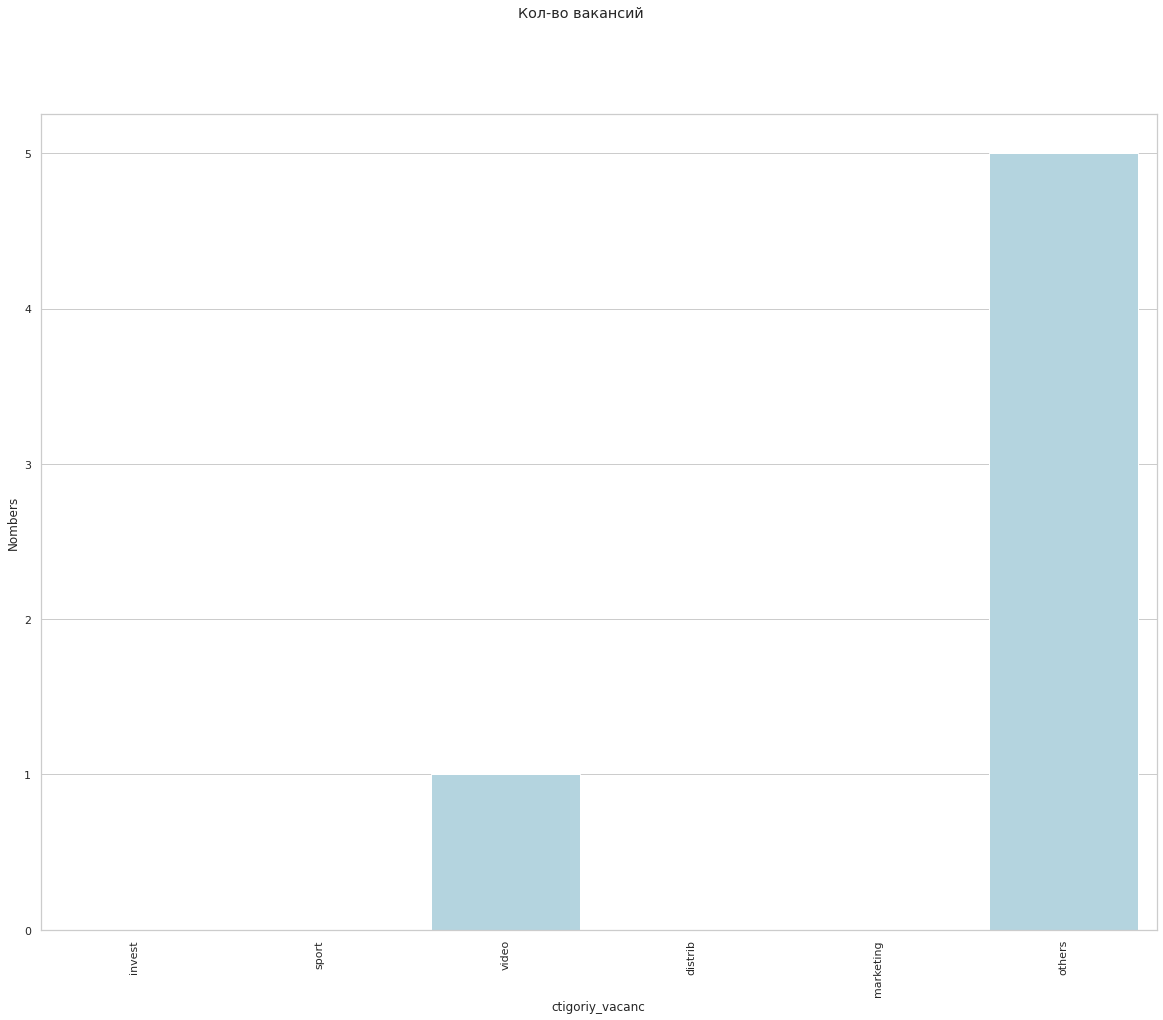

In [41]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(20,15))                
title = 'Кол-во вакансий'
fig.suptitle(title)
plt.xticks(rotation=90)  
#sns.barplot(data=salaries.sort_values(by='salary_from', ascending=False), x='employer_name', y='salary_from', color='lightblue', ax=ax)
sns.barplot(data=df_interes_vacanci, x='ctigoriy_vacanc', y='Nombers', color='lightblue', ax=ax) #salary_from


Обьеденю таблицы т.е добвлю строчки и фиксирую из какой таблицы были взяты данные

In [42]:
df_video_data_city['catigoriy']='video'
df_invest_data_city['catigoriy']='invest'
df_sport_data_city['catigoriy']='sport'
df_distrib_data_city['catigoriy']='distrib'
df_marketing_data_city['catigoriy']='marketing'
df_others_city['catigoriy']='others'

In [43]:
df_citi_zarplata=df_video_data_city

In [44]:
df_citi_zarplata=df_citi_zarplata.append(df_invest_data_city,ignore_index=True)
df_citi_zarplata=df_citi_zarplata.append(df_sport_data_city,ignore_index=True)
df_citi_zarplata=df_citi_zarplata.append(df_distrib_data_city,ignore_index=True)
df_citi_zarplata=df_citi_zarplata.append(df_marketing_data_city,ignore_index=True)
df_citi_zarplata=df_citi_zarplata.append(df_others_city,ignore_index=True)

<AxesSubplot:xlabel='catigoriy', ylabel='salary_from'>

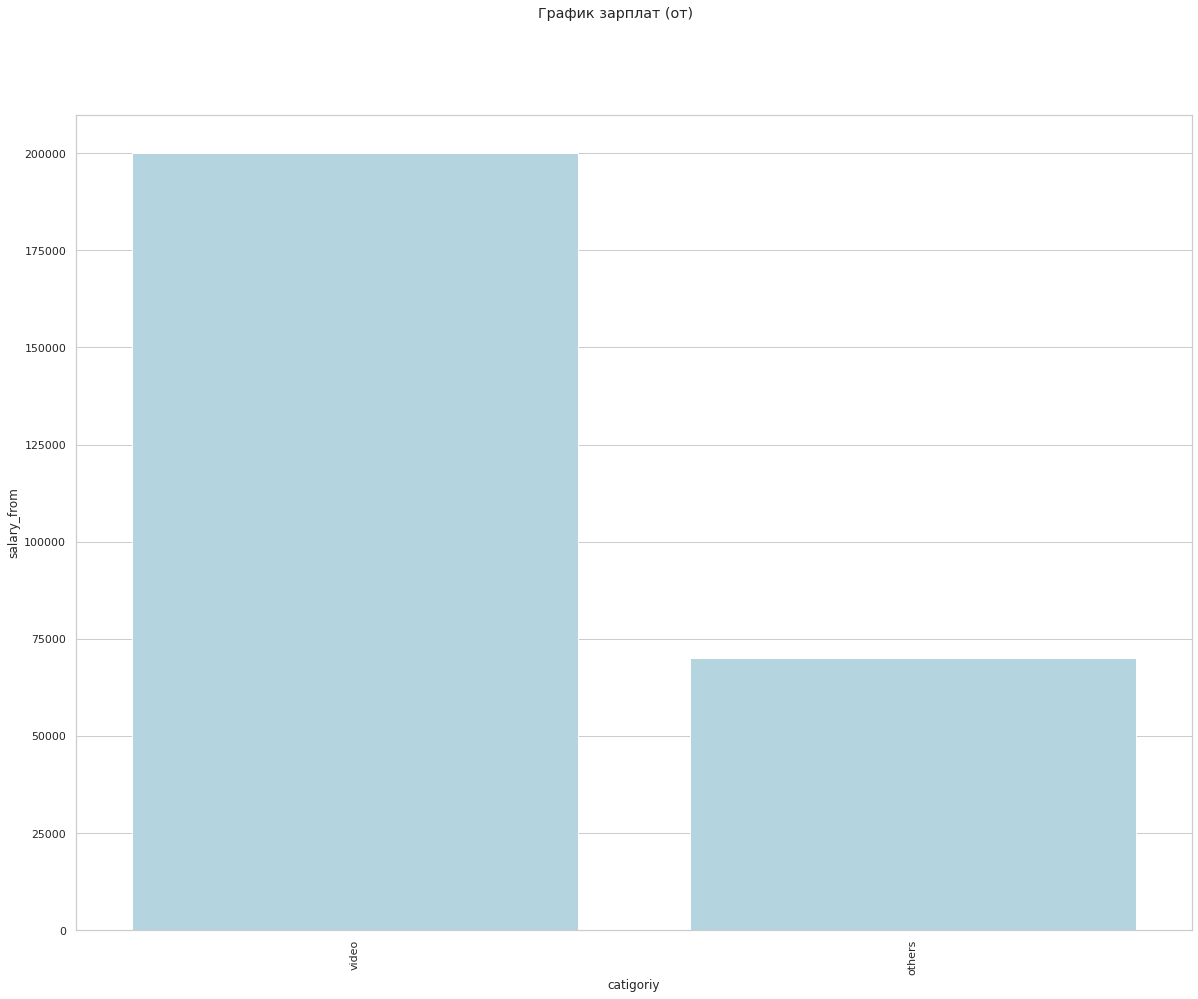

In [45]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(20,15))                
title = 'График зарплат (от)'
fig.suptitle(title)
plt.xticks(rotation=90)  
sns.barplot(data=df_citi_zarplata.sort_values(by='salary_from', ascending=False), x='catigoriy', y='salary_from'
            , color='lightblue'
            #, ax=axdf_citi_zarplata
           )

### Для просмотра ваканский из нужной категории нужно раскоментировать

In [46]:
ва

NameError: name 'ва' is not defined

In [47]:
#vacs_df_city=df_marketing_data_city
#vacs_df_city=df_video_data_city
#vacs_df_city=df_invest_data_city
#vacs_df_city=df_sport_data_city
#vacs_df_city=df_distrib_data_city
vacs_df_city=df_others_city

In [48]:
button = widgets.Button(description="show")
output = widgets.Output()

display(button, output)

counter = 0
def on_clicked(b):
    with output: 
        try:
            global counter
            clear_output()
            print('№ вакансии: ', counter)
            display(HTML("<h1>" + str(vacs_df_city['name'][counter]) + ' в ' + str(vacs_df_city['employer_name'][counter]) + "</h1>"))
            display(vacs[counter])
            display(HTML('<a href="' + str(vacs_df_city['alternate_url'][counter]) + '" target="_blank">Ссылка на вакансию</a>'))
            counter += 1
        except Exception as e:
            print('Вакансии закончились')
            
button.on_click(on_clicked)

Button(description='show', style=ButtonStyle())

Output()

## Рассматриваю вакансии для всех городов с удаленкой

In [49]:
columns_vacs_df=vacs_df.columns
df_invest_data= pd.DataFrame(columns=columns_vacs_df)
df_sport_data= pd.DataFrame(columns=columns_vacs_df)
df_video_data= pd.DataFrame(columns=columns_vacs_df)
df_distrib_data= pd.DataFrame(columns=columns_vacs_df)
df_marketing_data= pd.DataFrame(columns=columns_vacs_df)
df_others_data= pd.DataFrame(columns=columns_vacs_df)
df_error= pd.DataFrame(columns=columns_vacs_df)


vacs_df_all_city = vacancy_df.copy().reset_index(drop=True).query("experience in ['noExperience', 'between1And3']")
nomber_vacs_city=0
df_max=vacs_df_all_city['url'].count()

df_invest_count=0
df_invest=['инвестиции','инвестиций','акции','вложени','портфель','банк ',' банк']

df_sport_count=0
df_sport=['матч','трансляц']

df_video_count=0
df_video=['видео','изображен','зрени']

df_distrib_count=0
df_distrib=['ассортиме','полка','полку']

df_marketing_count=0
df_marketing=['маркетинговое агенст','маркетинговая компан','digital агентств']

df_others_count=0

df_error_count=0
sdf=0

nomber_error=0# Для отслеживания ошибки

for index_vacs in range(1,df_max):
#for index_vacs in range(1,500):  # Отладка
    url_vacs=vacs_df_all_city['url'][index_vacs]
    vacs = json.loads(requests.get(url_vacs).text)['description']
    vacs=vacs.lower()
    #print(index_vacs)
    check=0 # Что бы одни и те же вакансии не выводились
    nomber_error=0
    if ' python' in vacs:
        if ' удалённ' or ' удален' in vacs:
            print('Нашлась удаленая вакансия в строчке=',index_vacs)
            try:
                ############             Маркетинг
                #check==0
                for value in df_marketing:
                    if check==0:
                        nomber_error=1    
                        if value in vacs:
                            df_marketing_count+=1
                            check=1
                            nomber_error=2
                            df_marketing_data = df_marketing_data.append(vacs_df.iloc[index_vacs], ignore_index=True)
                            print('Маркетинг')
                            #print(vacs,index_vacs)
                            #print('=================

                for value in df_invest:
                    if check==0:
                        nomber_error=3
                        if value in vacs:
                            df_invest_count+=1
                            #df_invest_data = df_invest_data.append(vacs_df.iloc[index_vacs],ignore_index=True)
                            df_invest_data = df_invest_data.append(vacs_df_all_city.iloc[index_vacs],ignore_index=True)
                            print("df_invest_data-Записалось")
                            check=1
                            nomber_error=4
                            #print(vacs,index_vacs)
                            #print('===========================================================================================')

                            check=1
                #check==0            
                for value in df_sport:
                    if check==0:
                        nomber_error=5
                        if value in vacs:
                            df_sport_count+=1
                            check=1
                            nomber_error=6
                            #df_sport_data = df_sport_data.append(vacs_df.iloc[index_vacs], ignore_index=True)
                            df_sport_data = df_sport_data.append(vacs_df_all_city.iloc[index_vacs], ignore_index=True)
                            print("df_sport_data-Записалось")
                            #print(vacs,index_vacs)
                            #print('===========================================================================================')
               # check==0            
                for value in df_video:
                    if check==0:
                        nomber_error=7
                        if value in vacs:
                            df_video_count+=1   
                            check=1
                            nomber_error=8
                            #df_video_data = df_video_data.append(vacs_df.iloc[index_vacs], ignore_index=True)
                            df_video_data = df_video_data.append(vacs_df_all_city.iloc[index_vacs], ignore_index=True)
                            print("df_video_data-Записалось")
                            #print(vacs,index_vacs)
                            #print('===========================================================================================')
                #check==0
                for value in df_distrib:
                    if check==0:
                        nomber_error=9
                        if value in vacs:
                            df_distrib_count+=1
                            check=1
                            nomber_error=10
                            #df_distrib_data = df_distrib_data.append(vacs_df.iloc[index_vacs], ignore_index=True)
                            df_distrib_data = df_distrib_data.append(vacs_df_all_city.iloc[index_vacs], ignore_index=True)
                            print("df_distrib-Записалось")
                            #print(vacs,index_vacs)
                            #print('===========================================================================================')
                #==========================================================================')   
                if check==0:
                    df_others_data = df_others_data.append(vacs_df.iloc[index_vacs], ignore_index=True)
                    df_others_count+=1 
                    check=1
            except:
                df_error=df_error.append(vacs_df_all_city.iloc[index_vacs], ignore_index=True)
                df_error_count+=1
                print(nomber_error)
                print('Значение value',value)
                print('Значение vacs',vacs)
                print('Произошла ошибка в строчке=',index_vacs)
            

#Формирую таблицу
df_interes_vacanci333333 = {"data": [1,2,3,4,5,6,7], "ctigoriy_vacanc": ['invest', 'sport', 'video','distrib','marketing','others','error'], "Nombers": [df_invest_count, df_sport_count,df_video_count, df_distrib_count,df_marketing_count,df_others_count,df_error_count]}

df_interes_vacanci = pd.DataFrame(df_interes_vacanci333333)
df_interes_vacanci

#sns.set(style='whitegrid')
#fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(20,15))                
#title = 'График зарплат (от)'
#fig.suptitle(title)
#plt.xticks(rotation=90)  
##sns.barplot(data=salaries.sort_values(by='salary_from', ascending=False), x='employer_name', y='salary_from', color='lightblue', ax=ax)
#sns.barplot(data=df_interes_vacanci, x='ctigoriy_vacanc', y='Nombers', color='lightblue', ax=ax)


Нашлась удаленая вакансия в строчке= 1
Нашлась удаленая вакансия в строчке= 2
Нашлась удаленая вакансия в строчке= 3
Нашлась удаленая вакансия в строчке= 4
df_invest_data-Записалось
Нашлась удаленая вакансия в строчке= 9
Нашлась удаленая вакансия в строчке= 14
df_video_data-Записалось
Нашлась удаленая вакансия в строчке= 25
Нашлась удаленая вакансия в строчке= 29
Нашлась удаленая вакансия в строчке= 33
df_distrib-Записалось
Нашлась удаленая вакансия в строчке= 40
Нашлась удаленая вакансия в строчке= 42
Нашлась удаленая вакансия в строчке= 48
Нашлась удаленая вакансия в строчке= 59
df_video_data-Записалось
Нашлась удаленая вакансия в строчке= 60
df_invest_data-Записалось
Нашлась удаленая вакансия в строчке= 61
Нашлась удаленая вакансия в строчке= 80
9
Значение value полку
Значение vacs <p><strong>атон</strong> - старейшая инвестиционная компания россии.<br />на протяжении вот уже 30 лет мы помогаем принимать верные инвестиционные решения и формируем сообщество успешных инвесторов.</p> <

,data,ctigoriy_vacanc,Nombers
0,1,invest,61
1,2,sport,7
2,3,video,46
3,4,distrib,5
4,5,marketing,0
5,6,others,10
6,7,error,276


In [ ]:
vacs_df_all_city.iloc[195:197]

In [ ]:
vacs_df_all_city

In [50]:
# Интересные вакансии
df_interes_vacanci

,data,ctigoriy_vacanc,Nombers
0,1,invest,61
1,2,sport,7
2,3,video,46
3,4,distrib,5
4,5,marketing,0
5,6,others,10
6,7,error,276


In [ ]:
df_marketing_data_city


<AxesSubplot:xlabel='ctigoriy_vacanc', ylabel='Nombers'>

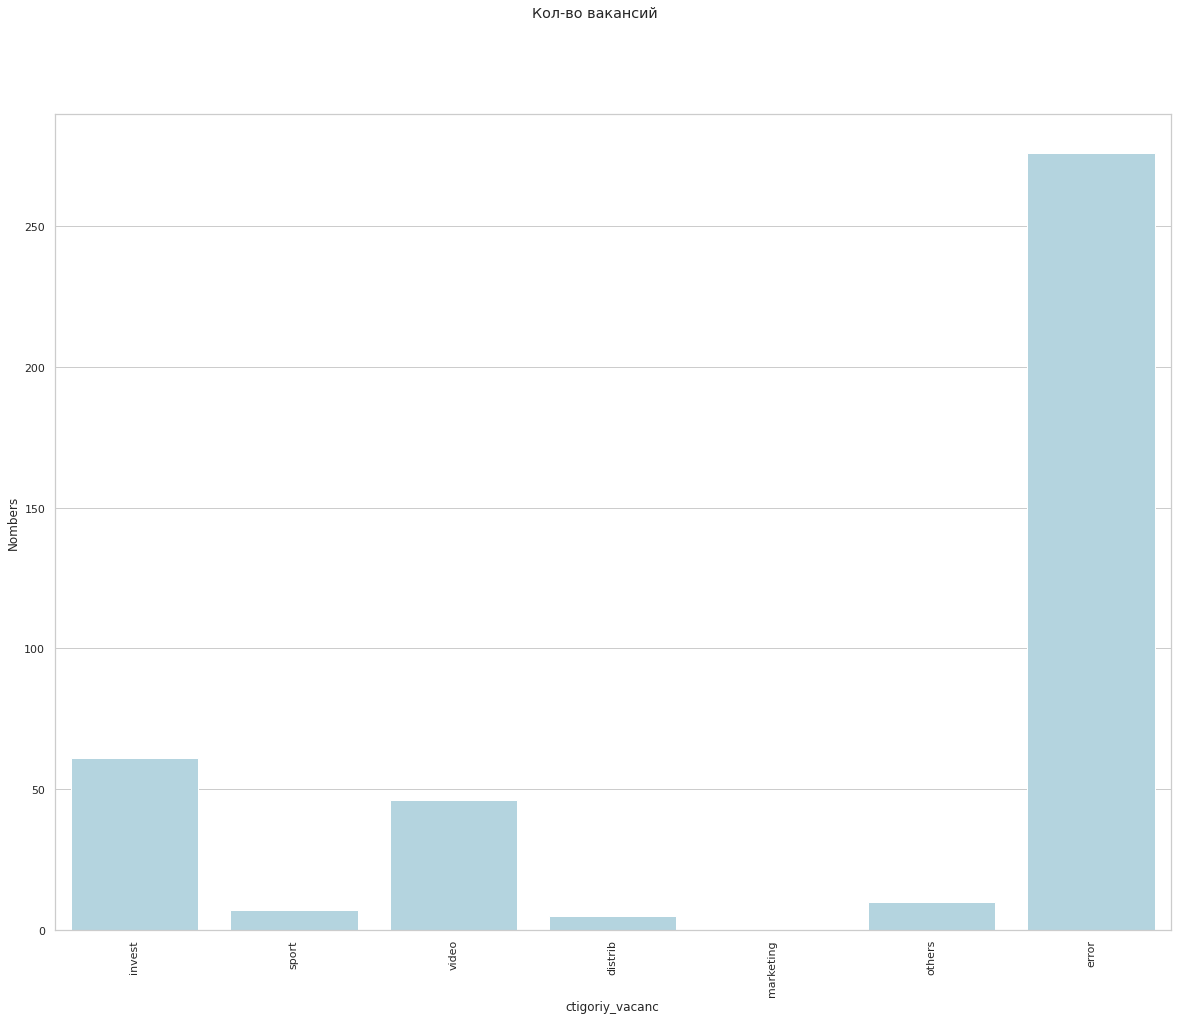

In [51]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(20,15))                
title = 'Кол-во вакансий'
fig.suptitle(title)
plt.xticks(rotation=90)  
#sns.barplot(data=salaries.sort_values(by='salary_from', ascending=False), x='employer_name', y='salary_from', color='lightblue', ax=ax)
sns.barplot(data=df_interes_vacanci, x='ctigoriy_vacanc', y='Nombers', color='lightblue', ax=ax) #salary_from

Посмотрю на зарплаты 

<AxesSubplot:xlabel='catigoriy', ylabel='salary_from'>

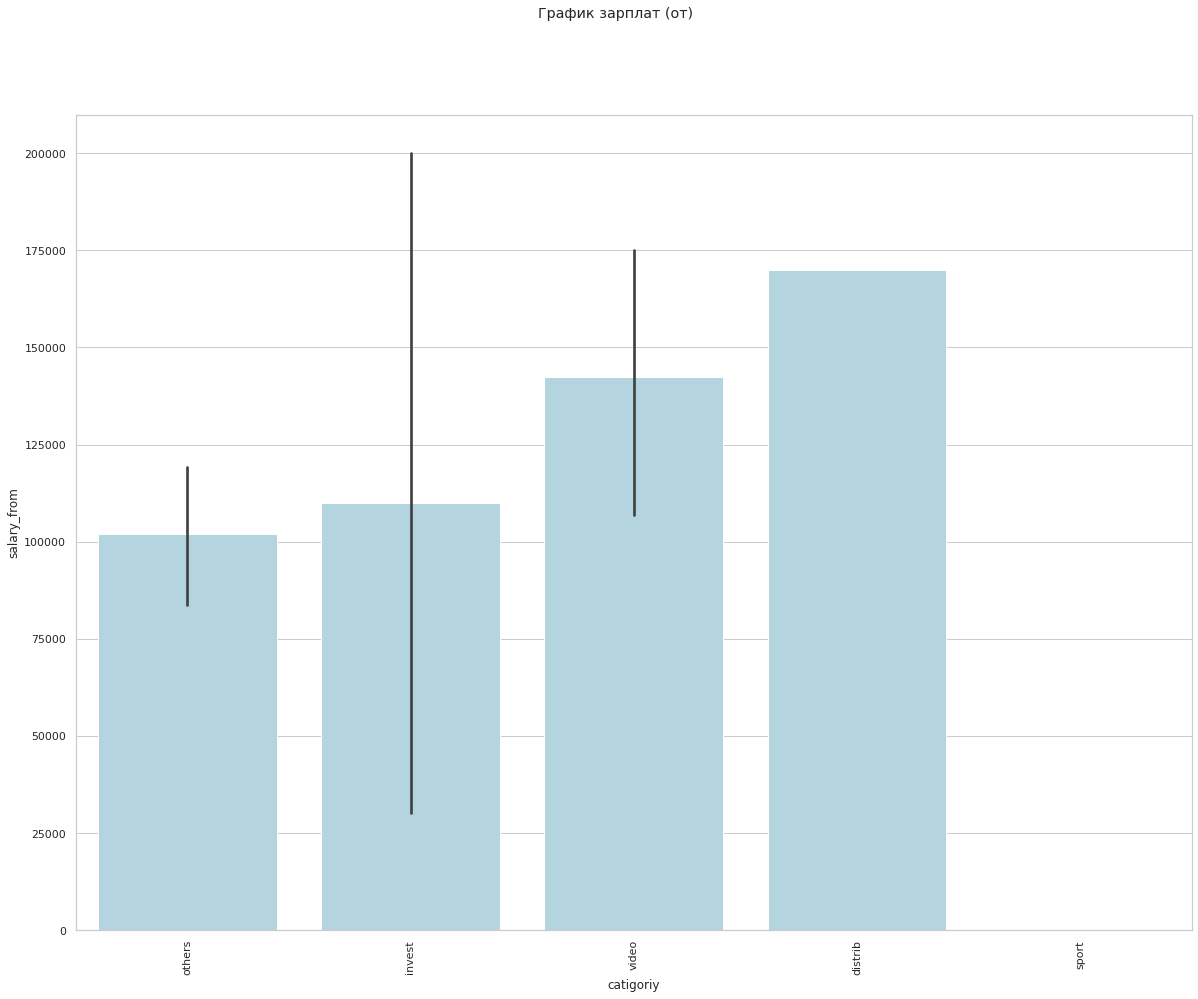

In [52]:
df_video_data['catigoriy']='video'
df_invest_data['catigoriy']='invest'
df_sport_data['catigoriy']='sport'
df_distrib_data['catigoriy']='distrib'

df_marketing_data['catigoriy']='marketing'
df_others_data['catigoriy']='others'
df_error['catigoriy']='others'
df_citi_zarplata=df_video_data




df_citi_zarplata=df_citi_zarplata.append(df_invest_data,ignore_index=True)
df_citi_zarplata=df_citi_zarplata.append(df_sport_data,ignore_index=True)
df_citi_zarplata=df_citi_zarplata.append(df_distrib_data,ignore_index=True)
df_citi_zarplata=df_citi_zarplata.append(df_marketing_data,ignore_index=True)
df_citi_zarplata=df_citi_zarplata.append(df_others_data,ignore_index=True)
df_citi_zarplata=df_citi_zarplata.append(df_error,ignore_index=True)
#df_marketing_data_city= pd.DataFrame(columns=columns_vacs_df)

sns.set(style='whitegrid')
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(20,15))                
title = 'График зарплат (от)'
fig.suptitle(title)
plt.xticks(rotation=90)  
sns.barplot(data=df_citi_zarplata.sort_values(by='salary_from', ascending=False), x='catigoriy', y='salary_from'
            , color='lightblue'
            #, ax=axdf_citi_zarplata
           )

df_video_data
df_invest_data
df_sport_data
df_distrib_data
df_marketing_data

### Вакансии с удаленной работой, для просмотра вакансий с нужной категорией нужно раскоментировать 

df_invest_data
df_sport_data
df_video_data
df_distrib_data

In [ ]:
vacs_df=df_interes_vacanci

In [55]:
#vacs_df=df_video_data
#vacs_df=df_invest_data
vacs_df=df_sport_data
#vacs_df=df_distrib_data
#vacs_df=df_marketing_data
#vacs_df=df_others_data
#vacs_df=df_error

In [56]:
button = widgets.Button(description="show")
output = widgets.Output()

display(button, output)

counter = 0
def on_clicked(b):
    with output: 
        try:
            global counter
            clear_output()
            print('№ вакансии: ', counter)
            display(HTML("<h1>" + str(vacs_df['name'][counter]) + ' в ' + str(vacs_df['employer_name'][counter]) + "</h1>"))
            display(vacs[counter])
            display(HTML('<a href="' + str(vacs_df['alternate_url'][counter]) + '" target="_blank">Ссылка на вакансию</a>'))
            counter += 1
        except Exception as e:
            print('Вакансии закончились')
            
button.on_click(on_clicked)

Button(description='show', style=ButtonStyle())

Output()

## Расмотрю все варианты без удаленой работы для всех горов

In [ ]:
columns_vacs_df=vacs_df.columns
df_invest_data1= pd.DataFrame(columns=columns_vacs_df)
df_sport_data1= pd.DataFrame(columns=columns_vacs_df)
df_video_data1= pd.DataFrame(columns=columns_vacs_df)
df_distrib_data1= pd.DataFrame(columns=columns_vacs_df)
df_marketing_data1= pd.DataFrame(columns=columns_vacs_df)

vacs_df_all_city = vacancy_df.copy().reset_index(drop=True).query("experience in ['noExperience', 'between1And3']")
nomber_vacs_city=0
df_max=vacs_df_all_city['url'].count()

df_invest_count=0
df_invest=['инвестиции','инвестиций','акции','вложени','портфель','маркетинговое агенст']

df_sport_count=0
df_sport=['матч','трансляц']

df_video_count=0
df_video=['видео','изображен','зрени']

df_distrib_count=0
df_distrib=['ассортиме','полка','полку']

df_marketing_count=0
df_marketing=['маркетинговое агенст','маркетинговая компан','digital агентств','маркетинговые кампани']

sdf=0

for index_vacs in range(1,df_max):
#for index_vacs in range(1,500):  # Отладка
    url_vacs=vacs_df_all_city['url'][index_vacs]
    vacs = json.loads(requests.get(url_vacs).text)['description']
    vacs=vacs.lower()
    #print(index_vacs)
    check=0 # Что бы одни и те же вакансии не выводились
    if ' python' in vacs:
        
       
        try:
            check==0
            for value in df_marketing:
                if check==0:
                    if value in vacs:
                        df_distrib_count+=1
                        check=1
                            #df_distrib_data = df_distrib_data.append(vacs_df.iloc[index_vacs], ignore_index=True)
                        df_marketing_data1 = df_marketing_data1.append(vacs_df_all_city.iloc[index_vacs], ignore_index=True)
                        print("Маркетинг-Записалось")
            check==0              

            for value in df_invest:
                if check==0:
                    if value in vacs:
                        df_invest_count+=1
                            #df_invest_data = df_invest_data.append(vacs_df.iloc[index_vacs],ignore_index=True)
                        df_invest_data1 = df_invest_data1.append(vacs_df_all_city.iloc[index_vacs],ignore_index=True)
                        print("df_invest_data-Записалось")
                            #print(vacs,index_vacs)
                            #print('===========================================================================================')

                        check=1
            check==0            
            for value in df_sport:
                if check==0:
                    if value in vacs:
                        df_sport_count+=1
                        check=1
                            #df_sport_data = df_sport_data.append(vacs_df.iloc[index_vacs], ignore_index=True)
                        df_sport_data1 = df_sport_data1.append(vacs_df_all_city.iloc[index_vacs], ignore_index=True)
                        print("df_sport_data-Записалось")
                            #print(vacs,index_vacs)
                            #print('===========================================================================================')
            check==0            
            for value in df_video:
                if check==0:
                    if value in vacs:
                        df_video_count+=1   
                        check=1
                            #df_video_data = df_video_data.append(vacs_df.iloc[index_vacs], ignore_index=True)
                        df_video_data1 = df_video_data1.append(vacs_df_all_city.iloc[index_vacs], ignore_index=True)
                        print("df_video_data-Записалось")
                            #print(vacs,index_vacs)
                            #print('===========================================================================================')
            check==0
            for value in df_distrib:
                if check==0:
                    if value in vacs:
                        df_distrib_count+=1
                        check=1
                            #df_distrib_data = df_distrib_data.append(vacs_df.iloc[index_vacs], ignore_index=True)
                        df_distrib_data1 = df_distrib_data1.append(vacs_df_all_city.iloc[index_vacs], ignore_index=True)
                        print("df_distrib-Записалось")
                            #print(vacs,index_vacs)
                            #print('===========================================================================================')
            ######################
            
        except:
            sdf+=1
            print('Произошла ошибка в строчке=',index_vacs)

#Формирую таблицу
df_interes_vacanci333333 = {"data": [1,2,3,4,5], "ctigoriy_vacanc": ['invest', 'sport', 'video','distrib','marketing'], "Nombers": [df_invest_count, df_sport_count,df_video_count, df_distrib_count,df_marketing_count]}

df_interes_vacanci = pd.DataFrame(df_interes_vacanci333333)
df_interes_vacanci


In [ ]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(20,15))                
title = 'Кол-во вакансий'
fig.suptitle(title)
plt.xticks(rotation=90)  
#sns.barplot(data=salaries.sort_values(by='salary_from', ascending=False), x='employer_name', y='salary_from', color='lightblue', ax=ax)
sns.barplot(data=df_interes_vacanci, x='ctigoriy_vacanc', y='Nombers', color='lightblue', ax=ax) #salary_from

In [ ]:
df_video_data1['catigoriy']='video'
df_invest_data1['catigoriy']='invest'
df_sport_data1['catigoriy']='sport'
df_distrib_data1['catigoriy']='distrib'
df_marketing_data1['catigoriy']='marketing'



df_citi_zarplata1=df_video_data1
df_citi_zarplata1=df_citi_zarplata1.append(df_invest_data1,ignore_index=True)
df_citi_zarplata1=df_citi_zarplata1.append(df_sport_data1,ignore_index=True)
df_citi_zarplata1=df_citi_zarplata1.append(df_distrib_data1,ignore_index=True)
df_citi_zarplata1=df_citi_zarplata1.append(df_marketing_data1,ignore_index=True)
sns.set(style='whitegrid')
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(20,15))                
title = 'График зарплат (от)'
fig.suptitle(title)
plt.xticks(rotation=90)  
sns.barplot(data=df_citi_zarplata1.sort_values(by='salary_from', ascending=False), x='catigoriy', y='salary_from'
            , color='lightblue'
            #, ax=axdf_citi_zarplata
           )

df_invest_data1= pd.DataFrame(columns=columns_vacs_df)
df_sport_data1= pd.DataFrame(columns=columns_vacs_df)
df_video_data1= pd.DataFrame(columns=columns_vacs_df)
df_distrib_data1= pd.DataFrame(columns=columns_vacs_df)

### для просмотра вакансий с нужной категорией нужно раскоментировать¶

In [ ]:
vacs_df=df_invest_data1
#vacs_df=df_sport_data1
#vacs_df=df_distrib_data1
#vacs_df=df_marketing_data1
#vacs_df=df_video_data1

In [ ]:

button = widgets.Button(description="show")
output = widgets.Output()

display(button, output)

counter = 0
def on_clicked(b):
    with output: 
        try:
            global counter
            clear_output()
            print('№ вакансии: ', counter)
            display(HTML("<h1>" + str(vacs_df['name'][counter]) + ' в ' + str(vacs_df['employer_name'][counter]) + "</h1>"))
            display(vacs[counter])
            display(HTML('<a href="' + str(vacs_df['alternate_url'][counter]) + '" target="_blank">Ссылка на вакансию</a>'))
            counter += 1
        except Exception as e:
            print('Вакансии закончились')
            
button.on_click(on_clicked)